# [데이콘 참고 링크](https://dacon.io/competitions/official/235743/codeshare/2846?page=1&dtype=recent)

# 라이브러리 로드

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from IPython.display import set_matplotlib_formats

warnings.filterwarnings('ignore')
set_matplotlib_formats('svg')
plt.style.use('ggplot')

# 데이터 로드

In [5]:
path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/cafeteria/"
train = pd.read_csv(path + 'train.csv', encoding='utf-8')
test = pd.read_csv(path + 'test.csv', encoding='utf-8')

In [6]:
train.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


In [7]:
test.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지


In [17]:
print('train shape : {}'.format(train.shape))
print("test shape : {}".format(test.shape))

train shape : (1205, 12)
test shape : (50, 10)


# 데이터 전처리

In [18]:
#컬럼명 수정하기
train.columns = ['date','dow',"employees","dayoff","bustrip","ovtime","remote","brk","ln","dn","target_ln",'target_dn']
train.head(2)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,ln,dn,target_ln,target_dn
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


In [19]:
test.columns = ['date','dow',"employees","dayoff","bustrip","ovtime","remote","brk","ln","dn"]
test.head(2)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,ln,dn
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지


## 날짜와 요일
날짜를 datetime 형식으로 바꾸기

dow(day of week) 정보를 숫자로 바꾸기

In [25]:
def to_datetime(df, date):
  df['date'] = pd.to_datetime(df[date])
  df['dow'] = pd.to_datetime(df[date]).dt.weekday + 1

In [26]:
to_datetime(train, "date")
to_datetime(test, 'date')

In [27]:
train.head(2)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,ln,dn,target_ln,target_dn
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


In [28]:
test.head(2)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,ln,dn
0,2021-01-27,3,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,4,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1205 non-null   datetime64[ns]
 1   dow        1205 non-null   int64         
 2   employees  1205 non-null   int64         
 3   dayoff     1205 non-null   int64         
 4   bustrip    1205 non-null   int64         
 5   ovtime     1205 non-null   int64         
 6   remote     1205 non-null   float64       
 7   brk        1205 non-null   object        
 8   ln         1205 non-null   object        
 9   dn         1205 non-null   object        
 10  target_ln  1205 non-null   float64       
 11  target_dn  1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 113.1+ KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       50 non-null     datetime64[ns]
 1   dow        50 non-null     int64         
 2   employees  50 non-null     int64         
 3   dayoff     50 non-null     int64         
 4   bustrip    50 non-null     int64         
 5   ovtime     50 non-null     int64         
 6   remote     50 non-null     float64       
 7   brk        50 non-null     object        
 8   ln         50 non-null     object        
 9   dn         50 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 4.0+ KB


## 메뉴명

In [37]:
#일별 점심메뉴를 작은 리스트로 갖고 있는 큰 리스트(lunch) 만들기
lunch = []
for day in range(len(train)):
  temp = train.iloc[day, 8].split(' ') # 공백으로 문자열 구분
  temp = ' '.join(temp).split() #빈원소 삭제

  search = "(" #원산지 정보 삭제
  for menu in temp:
    if search in menu:
      temp.remove(menu)
      
  lunch.append(temp)

In [38]:
lunch[0:5]

[['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치']]

In [40]:
lunch[1065:1070]

[['쌀밥/잡곡밥', '매운소고기국', '굴비구이', '토마토프리타타', '도라지오이무침', '배추겉절이'],
 ['돈육버섯고추장덮밥', '팽이무국', '양파링카레튀김', '모듬어묵볶음', '참나물생채', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '냉모밀국수', '매운돈갈비찜', '메밀전병*간장', '고구마순볶음', '포기김치', '양상추샐러드*딸기요거트'],
 ['쌀밥/잡곡밥', '대파육개장', '홍어미나리초무침', '어묵잡채', '콩자반', '배추겉절이', '양상추샐러드*오리엔탈'],
 ['카레라이스', '동태알탕', '부추고추전*간장', '쫄면야채무침', '과일요거트샐러드', '포기김치', '요구르트']]

점심메뉴를 살펴보니, 처음에는 밥 / 국 / 반찬1 /반찬2 / 반찬3 / 사이드(요구르트) / 김치 순서로 기록됨.

어느날 갑자기 사이드(샐러드)와 김치의 순서가 뒤바뀜.
  - 1067번 행 부터 바뀌는 것을 확인
  - 추가로 어떤 날짜에서 순서가 뒤바뀌는지 확인

In [47]:
np.array(train[(train.index > 1064) & (train.index < 1069)][['date','ln']])


array([[Timestamp('2020-06-11 00:00:00'),
        '쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 매운소고기국  굴비구이  토마토프리타타  도라지오이무침  배추겉절이 (배추국내,고추가루:중국산) '],
       [Timestamp('2020-06-12 00:00:00'),
        '돈육버섯고추장덮밥 (쌀,돈육:국내산) 팽이무국  양파링카레튀김  모듬어묵볶음  참나물생채 요구르트 포기김치 (김치:국내산) '],
       [Timestamp('2020-07-01 00:00:00'),
        '쌀밥/잡곡밥 냉모밀국수 매운돈갈비찜 메밀전병*간장 고구마순볶음 포기김치 양상추샐러드*딸기요거트 '],
       [Timestamp('2020-07-02 00:00:00'),
        '쌀밥/잡곡밥 대파육개장 홍어미나리초무침 어묵잡채 콩자반 배추겉절이 양상추샐러드*오리엔탈 ']],
      dtype=object)

2020-07-01 부터 순서가 바뀜

메뉴는 밥, 국, 반찬 1-3, 김치, 사이드로 구분
  - 사이드는 다른 메뉴들을 제외한 메뉴이며, 주로 요구르트나 샐러드류가 있음

In [49]:
for j in range(5):


0
1
2
3
4


In [51]:
#lunch train data에 매뉴명별 칼럼 만들기(밥, 국, 반찬1-3)
bob = []
gook = []
banchan1 = []
banchan2 = []
banchan3 = []
kimchi = []
side = []

mains = [bob, gook, banchan1, banchan2, banchan3]
for i, day_menu in enumerate(lunch):
  bob_temp = day_menu[0]
  bob.append(bob_temp)
  gook_temp = day_menu[1]
  gook.append(gook_temp)
  banchan1_temp = day_menu[2]
  banchan1.append(banchan1_temp)
  banchan2_temp = day_menu[3]
  banchan2.append(banchan2_temp)
  banchan3_temp = day_menu[4]
  banchan3.append(banchan3_temp)

  if i < 1067:
    kimchi_temp = day_menu[-1]
    kimchi.append(kimchi_temp)
    side_temp = day_menu[-2]
    side.append(side_temp)
  else:
    kimchi.append(day_menu[-2])
    side.append(day_menu[-1])

In [52]:
train_ln = train[['date', 'dow','employees',"dayoff","bustrip","ovtime","remote","ln","target_ln"]]
train_ln['bob'] = bob
train_ln['gook'] = gook
train_ln['banchan1'] = banchan1
train_ln['banchan2'] = banchan2
train_ln['banchan3'] = banchan3
train_ln['kimchi'] = kimchi
train_ln['side'] = side

In [53]:
train_ln.iloc[1066 : 1070, 7:]

,ln,target_ln,bob,gook,banchan1,banchan2,banchan3,kimchi,side
1066,"돈육버섯고추장덮밥 (쌀,돈육:국내산) 팽이무국 양파링카레튀김 모듬어묵볶음 참나...",516.0,돈육버섯고추장덮밥,팽이무국,양파링카레튀김,모듬어묵볶음,참나물생채,포기김치,요구르트
1067,쌀밥/잡곡밥 냉모밀국수 매운돈갈비찜 메밀전병*간장 고구마순볶음 포기김치 양상추샐러드...,866.0,쌀밥/잡곡밥,냉모밀국수,매운돈갈비찜,메밀전병*간장,고구마순볶음,포기김치,양상추샐러드*딸기요거트
1068,쌀밥/잡곡밥 대파육개장 홍어미나리초무침 어묵잡채 콩자반 배추겉절이 양상추샐러드*오리엔탈,675.0,쌀밥/잡곡밥,대파육개장,홍어미나리초무침,어묵잡채,콩자반,배추겉절이,양상추샐러드*오리엔탈
1069,카레라이스 동태알탕 부추고추전*간장 쫄면야채무침 과일요거트샐러드 포기김치 요구르트,607.0,카레라이스,동태알탕,부추고추전*간장,쫄면야채무침,과일요거트샐러드,포기김치,요구르트


**점심 메뉴 둘러보기**

In [57]:
gook_df = train_ln['gook'].value_counts().reset_index()
gook_df.head(10)

,index,gook
0,맑은국,46
1,콩나물국,44
2,된장찌개,37
3,어묵국,31
4,배추된장국,28
5,아욱국,28
6,가쯔오장국,28
7,근대국,26
8,꽃게탕,25
9,순두부찌개,23


In [58]:
gook_df.tail(5)

,index,gook
267,팽이무국,1
268,홍합살미역국,1
269,건새우무채국,1
270,통계란꼬치어묵탕,1
271,쑥된장국,1


In [59]:
gook_df['gook'].describe()

count    272.000000
mean       4.430147
std        7.022545
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       46.000000
Name: gook, dtype: float64

In [60]:
# 반찬 1~3
train_ln['banchan1'][0:3]

0     쇠불고기
1    가자미튀김
2     치킨핑거
Name: banchan1, dtype: object

In [64]:
banchan_list = []
for i in range(3):
  temp = train_ln['{}{}'.format('banchan', i+1)]
  for j in range(len(train_ln)):
    temp2 = temp[j]
    banchan_list.append(temp2)

In [77]:
banchan_df = pd.DataFrame(pd.DataFrame(banchan_list).value_counts())
banchan_df.columns=['banchan']
banchan_df = banchan_df.reset_index()
banchan_df.columns = ['banchan','count']

In [78]:
banchan_df.head(10)

,banchan,count
0,오이무침,35
1,오징어볶음,32
2,닭갈비,30
3,버섯불고기,29
4,콩나물무침,28
5,계란말이,28
6,훈제오리구이,27
7,돈육굴소스볶음,25
8,새송이버섯전,24
9,계란찜,24


In [79]:
banchan_df.tail(5)

,banchan,count
1169,소세지구이,1
1170,소세지감자조림,1
1171,소고기잡채,1
1172,소고기숙주나물볶음,1
1173,(New)파프리카계란전,1


In [80]:
banchan_df['count'].describe()

count    1174.000000
mean        3.079216
std         4.371070
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        35.000000
Name: count, dtype: float64

반찬은 국보다 서로 다른 값들이 훨씬 많음(1174개의 서로 다른 반찬 종류가 존재)

같은 반찬은 최대 35번 나옴
  - 전반적으로 반찬이 국보다 더 다채롭게 제공


# 간단한 시각화

In [81]:
train.head(2)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,ln,dn,target_ln,target_dn
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


## 점심 및 저녁 이용자 수

가장 간단하게 히스토그램을 이용하여 예측하고 싶은 target 값들을 시각화

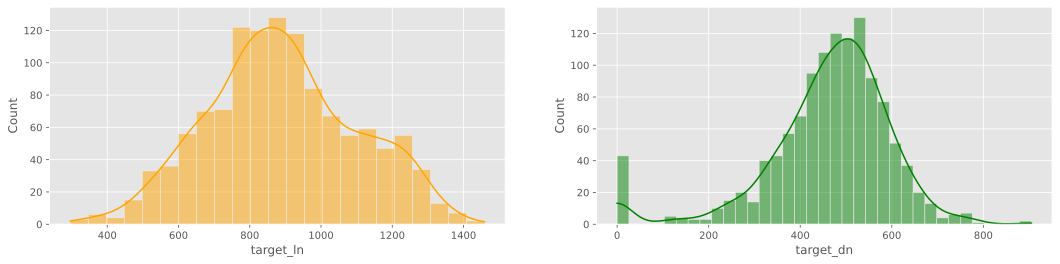

In [86]:
f, ax = plt.subplots(1,2, figsize=(18,4))
sns.histplot(data=train, x='target_ln', kde=True, ax=ax[0], color='orange')
sns.histplot(data=train, x='target_dn', kde=True, ax=ax[1], color='green')
plt.show()


저녁 이용자 수에서 0명이 존재하는 날이 있음

전반적으로 저녁이용자가 점심이용자보다 적음

## 코로나

코로나 전후로 차이가 있는지 확인

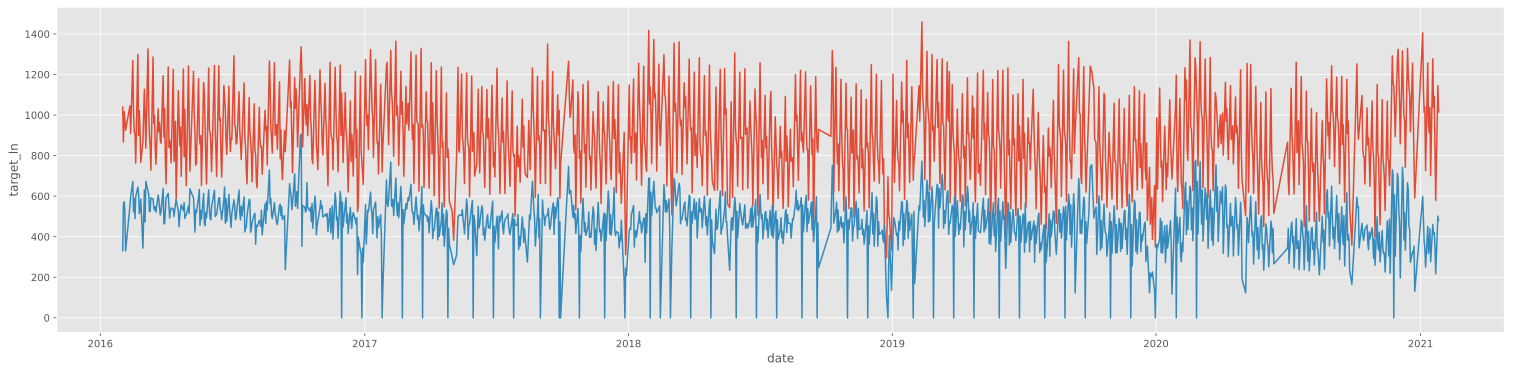

In [94]:
plt.figure(figsize=(26,6))
sns.lineplot(data=train, x='date', y='target_ln')
sns.lineplot(data=train, x='date', y='target_dn')
plt.show()

점심의 경우 : 별다른 패턴을 찾기는 어려움

저녁의 경우 : 특정한 날에 이용자 수가 확 줄어드는 날(0명)이 2016년 말 ~ 2020년 초반까지 보임
  - 오류인지 확인해볼 필요가있음

코로나19로 인해 점심과 저녁 이용자수가 전반적으로 줄었을 것이라 예상 했으나 별로 차이가 없음
  - 한 가지 작은 차이는 2020년 초 이후부터 저녁 0명이 되는 날이 거의 없음

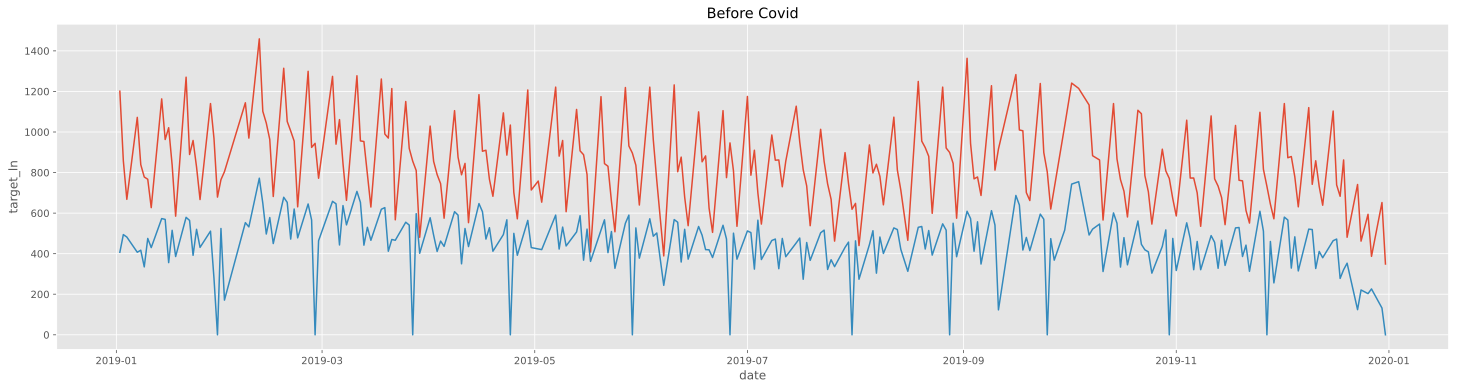

In [102]:
before_covid = train[train['date'].dt.year == 2019][['date', 'target_ln',"target_dn"]]

plt.figure(figsize=(25,6))
sns.lineplot(data=before_covid,x='date' ,y='target_ln')
sns.lineplot(data=before_covid,x='date' ,y='target_dn')
plt.title("Before Covid")
plt.show()

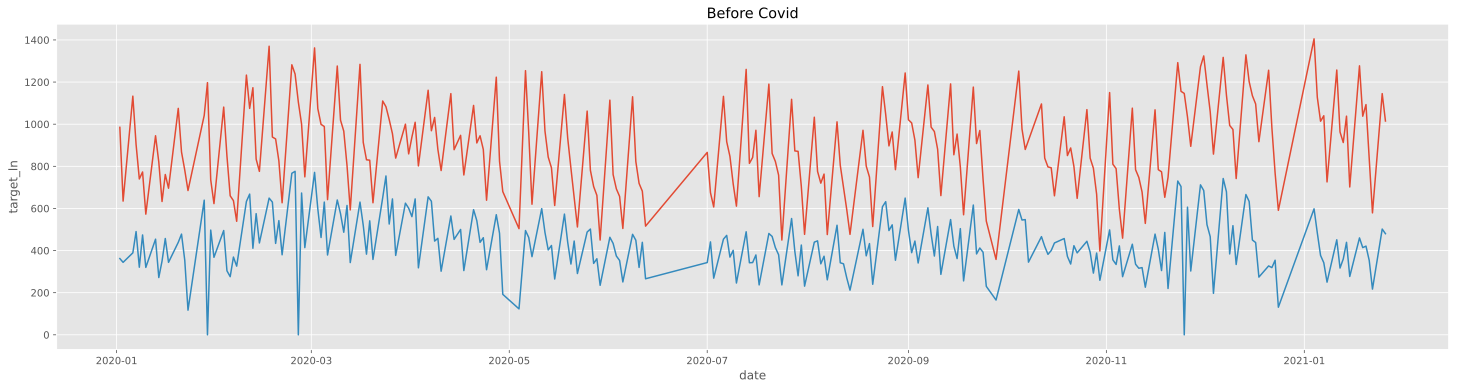

In [101]:
after_covid = train[train['date'].dt.year >= 2020][['date','target_ln',"target_dn"]]

plt.figure(figsize=(25,6))
sns.lineplot(data=after_covid,x='date' ,y='target_ln')
sns.lineplot(data=after_covid,x='date' ,y='target_dn')
plt.title("Before Covid")
plt.show()

코로나 전후 점심과 저녁 이용자 평균

In [106]:
before_covid_ln_mean = np.round(before_covid['target_ln'].mean(),2)
before_covid_dn_mean = np.round(before_covid['target_dn'].mean(),2)

after_covid_ln_mean = np.round(after_covid['target_ln'].mean(), 2)
after_covid_dn_mean = np.round(after_covid['target_dn'].mean(), 2)

print("점심 : 2019년에는 : {}, 2020년에는 : {}".format(before_covid_ln_mean, after_covid_ln_mean))
print("저녁 : 2019년에는 : {}, 2020년에는 : {}".format(before_covid_dn_mean, after_covid_dn_mean))

점심 : 2019년에는 : 850.51, 2020년에는 : 890.97
저녁 : 2019년에는 : 445.39, 2020년에는 : 428.34


2019년과 2020년만을 따로 보니, 딱히 코로나19로 인해 점심/저녁 이용자수가 크게 달라진 것 같지는 않음

- 오히려 점심의 경우 2020년 이용자수 평균(890명)이 2019년(850명)보다 높았음

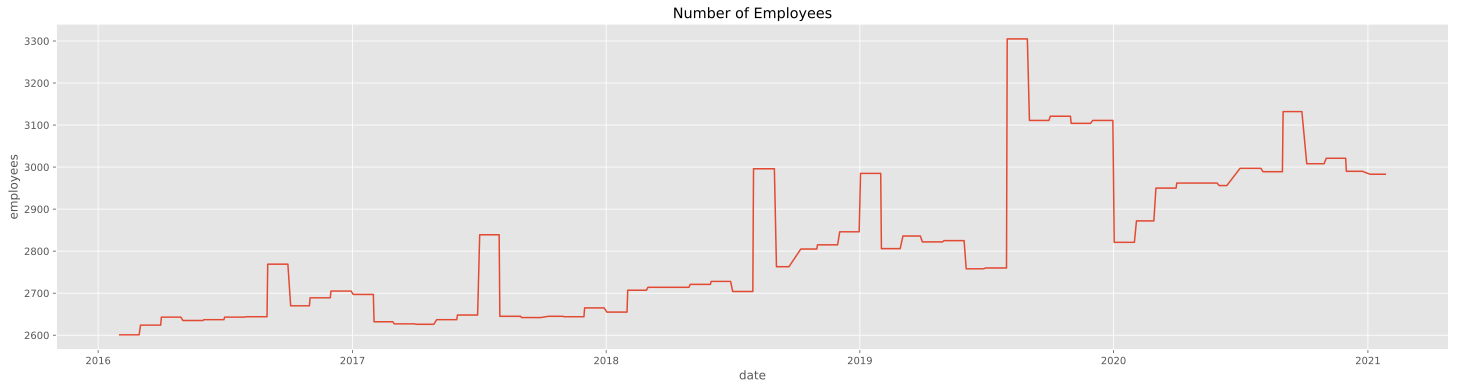

In [108]:
plt.figure(figsize=(25,6))
sns.lineplot(data=train, x='date', y='employees')
plt.title("Number of Employees")
plt.show()

본사의 총 정원수가 조금씩 증가하는 양상을 보이기는 하지만, 2019년과 2020년만을 비교해보면 딱히 2020년 정원수가 더 많다고는 할 수 없음

**참고**

이전에 저녁 이용자수를 확인했을 때, 0명인 날들이 있었음

In [111]:
train.loc[train['target_dn']==0][["date","dayoff","bustrip","ovtime","remote","dow","dn","target_dn"]]

,date,dayoff,bustrip,ovtime,remote,dow,dn,target_dn
204,2016-11-30,68,207,0,0.0,3,*,0.0
224,2016-12-28,166,225,0,0.0,3,*,0.0
244,2017-01-25,79,203,0,0.0,3,*,0.0
262,2017-02-22,75,252,0,0.0,3,*,0.0
281,2017-03-22,53,235,0,0.0,3,*,0.0
306,2017-04-26,45,304,0,0.0,3,*,0.0
327,2017-05-31,43,265,0,0.0,3,자기계발의날,0.0
346,2017-06-28,58,259,0,0.0,3,*자기계발의날*,0.0
366,2017-07-26,254,246,0,0.0,3,가정의날,0.0
392,2017-09-01,177,303,45,0.0,5,*,0.0


저녁 이용자가 0명이이었던 이유
- 월별 마지막(또는 그 전주) 수요일(dow가 3인날)은 '자기 개발의 날' 
- '자기 개발의 날'은 저녁메뉴가 빈칸
- 저녁메뉴가 제공이 되었는데 이용자가 0명이날이 존재
   - 2017-09-27, 2018-02-14
- 2017년은 황금연휴 전주
- 2018년은 설날 연휴 전날

## 변수 간 상관관계

In [112]:
train.head(2)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,ln,dn,target_ln,target_dn
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


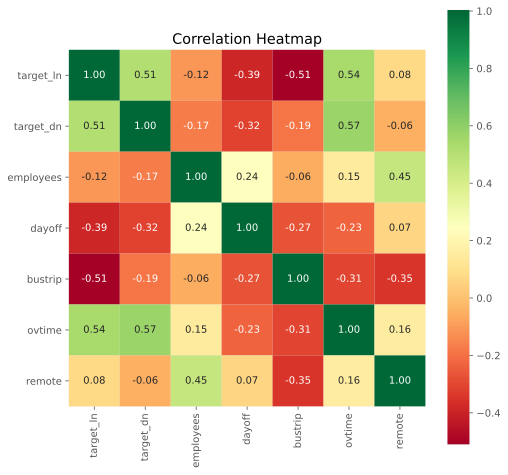

In [121]:
df = train[['target_ln',"target_dn","employees","dayoff","bustrip","ovtime","remote"]]
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f',cmap='RdYlGn',square=True)
plt.title("Correlation Heatmap")
plt.show()

점심의 경우 :
  - target_ln에 해당하는 열을 보면, 이 변수과 가장 상관관계가 높은 독립변수는 ovtime(0.54) 다음으로는 bustrip(-0.51)입니다.
    - 시간외 근무자는 양의 상관, 출장자수는 음의 상관, 이는 각각 회사 내에 직원이 많이 있느냐와 적게 있느냐에 영향을 끼치는 요인
    - 시간외 근무자는 야근을 한다는 것임, 저녁 뿐만 아니라 점심 이용자수 와도 상관을 보임
  - dayoff(-0.39) 휴가자수 역시 출장자수와 비슷하게 음의 상관을 가지고 있음

저녁의 경우 :
  - 점심의 경우와 크게 다르지 않지만 bustrip, dayoff와의 상관관계가 점심보다 약해짐
  - ovtime의 경우 0.57로 더 커짐
    - 야근하는 직원수가 많은 당연히 저녁 이용자수가 많아질 것임

## 산점도

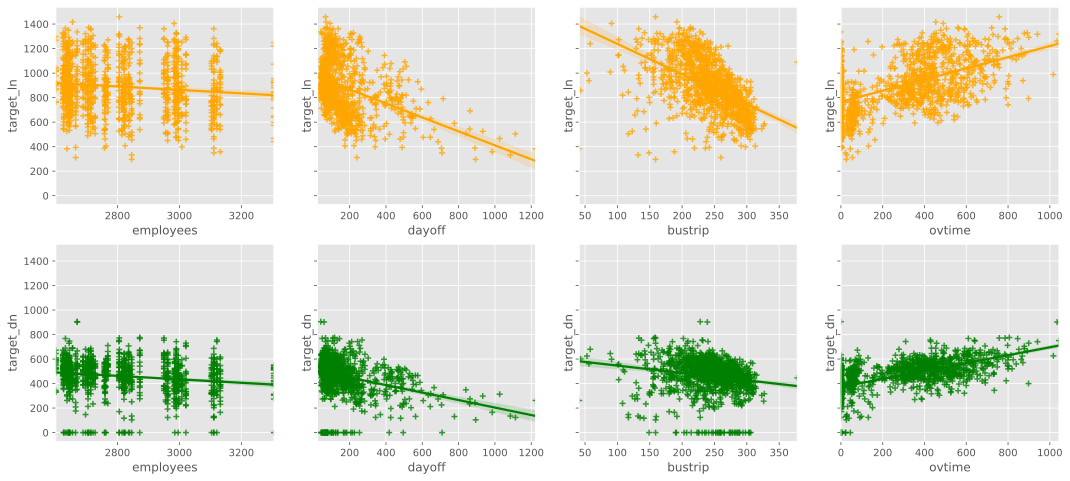

In [126]:
f, ax =plt.subplots(2,4,figsize=(18,8), sharey=True)
train_features = ['employees',"dayoff","bustrip","ovtime","employees","dayoff","bustrip","ovtime"]
for i , feature in enumerate(train_features):
  row = int(i/4)
  col = i % 4
  if i <  4:
    sns.regplot(data=train, x=feature, y='target_ln',ax = ax[row][col],color='orange',marker="+")
  else:
    sns.regplot(data=train, x=feature, y='target_dn',ax = ax[row][col],color='green',marker="+") 

## 월별 & 요일별 패턴

### 점심 및 저녁 이용자수

In [127]:
train.head(3)

,date,dow,employees,dayoff,bustrip,ovtime,remote,brk,ln,dn,target_ln,target_dn
0,2016-02-01,1,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,2,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,3,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [136]:
temp = train[['date','dow',"employees","dayoff","bustrip","ovtime","remote","target_ln","target_dn"]]
temp['month'] = temp['date'].dt.strftime("%m")

temp_ln = temp.groupby(['dow','month'])['target_ln'].mean().reset_index().pivot(index = 'dow',columns = "month",values ="target_ln")
temp_dn = temp.groupby(['dow','month'])['target_dn'].mean().reset_index().pivot(index = 'dow',columns = "month",values ="target_dn")

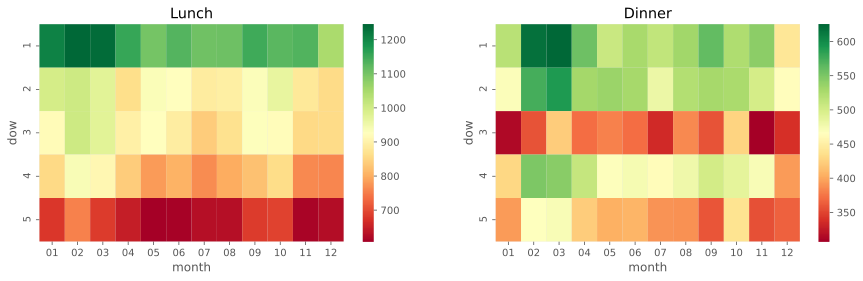

In [138]:
f, ax = plt.subplots(1,2,figsize=(15,4))

sns.heatmap(temp_ln, cmap='RdYlGn', ax=ax[0])
ax[0].set_title("Lunch")
sns.heatmap(temp_dn, cmap='RdYlGn', ax=ax[1])
ax[1].set_title("Dinner")
plt.show()

점심
- 월요일에 압도적으로 이용자수가 많습니다.
  - 다른 요일에 비해 월요일에 점심 이용자수가 많은 것은 1년 내내 보여지는 패턴입니다.
- 화요일과 수요일에도 대략 1000명의 이용자수가 있습니다.
- 목요일과 금요일은 점심 이용자수가 적습니다. 

저녁 
- 저녁이용자수는 전체적으로 점심이용자수보다 적습니다.
- 점심과 마찬가지로 월요일 이용자수가 많습니다.
- 점심과는 다르게 화요일에도 월요일과 비슷한 수준으로 이용자수가 많습니다.
  - 월, 화요일에 야근하는 직원들이 많은지 확인!
- 예상외로 수요일에 저녁이용사 수가 적음
  - 이유는 '자기 개발의 날'로 추측함


'자기 개발의 날' 제거

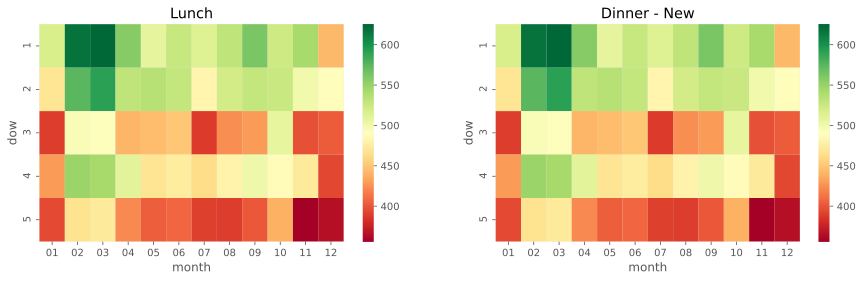

In [141]:
idx = train.loc[train['target_dn'] == 0].index
temp = train.drop(idx)
temp['month'] = temp['date'].dt.strftime('%m')
temp_dn2 = temp.groupby(['dow',"month"])['target_dn'].mean().reset_index().pivot(index='dow', columns='month', values='target_dn')

f, ax = plt.subplots(1,2,figsize=(15,4))
sns.heatmap(data=temp_dn2, cmap='RdYlGn', ax=ax[0])
ax[0].set_title("Lunch")
sns.heatmap(data=temp_dn2, cmap='RdYlGn', ax=ax[1])
ax[1].set_title("Dinner - New")
plt.show()

저녁
- '자기 개발의 날'을 제외했는데도, 수요일에는 여전히 저녁 이용자수가 적은 편입니다.
- 2,3월에 야근하는 직원들의 수가 많아보임

점심과 저녁 이용자 수 모두 대체로 요일별 패턴이 가장 극명하게 보입니다.

구내식당 이용자수를 예측할 때 요일이 중요한 요인으로 확인할수 있습니다.

### 회사에 있는 직원 수

이번에는 요일 & 월별로 회사 내에 있는 직원 수가 얼마나 다른지 확인해보겠습니다.

이들은 잠재적으로 점심과 저녁을 먹을 사람들입니다.

- 회사 내에 직원수는 employees - (dayoff + bustrip + remote)
  - 재택근무자수는 2020년의 데이터만 시각화
    - 2019년 까지는 0명이었음

In [142]:
before = train['date'].dt.year < 2020
after = train['date'].dt.year >= 2020

train[before]['remote'].value_counts() #코로나19 전 재택근무자수

0.0    956
Name: remote, dtype: int64

In [175]:
def heatmap_viz(df):
  df['month'] = df['date'].dt.strftime('%m')
  before = df['date'].dt.year < 2020
  after = df['date'].dt.year >= 2020

  temp_dayoff = df.groupby(['dow', 'month'])['dayoff'].mean().reset_index().pivot('dow', 'month', 'dayoff')
  temp_bustrip = df.groupby(['dow', 'month'])['bustrip'].mean().reset_index().pivot('dow', 'month', 'bustrip')
  temp_ovtime = df.groupby(['dow', 'month'])['ovtime'].mean().reset_index().pivot('dow', 'month', 'ovtime')
  temp_remote_after = df[after].groupby(['dow', 'month'])['remote'].mean().reset_index().pivot('dow', 'month', 'remote')
  
  f, ax = plt.subplots(1,4, figsize=(25,5), sharey=True)

  sns.heatmap(temp_dayoff, cmap='Oranges', ax=ax[0])
  ax[0].set_title("Dayoff")
  sns.heatmap(temp_bustrip, cmap="Greens", ax=ax[1])
  ax[1].set_title("Business Trip")
  sns.heatmap(temp_ovtime, cmap="Blues", ax=ax[2])
  ax[2].set_title("Overtime")
  sns.heatmap(temp_remote_after, cmap='Purples', ax=ax[3])
  ax[3].set_title("Remote (2020-21 only)")

  plt.show()

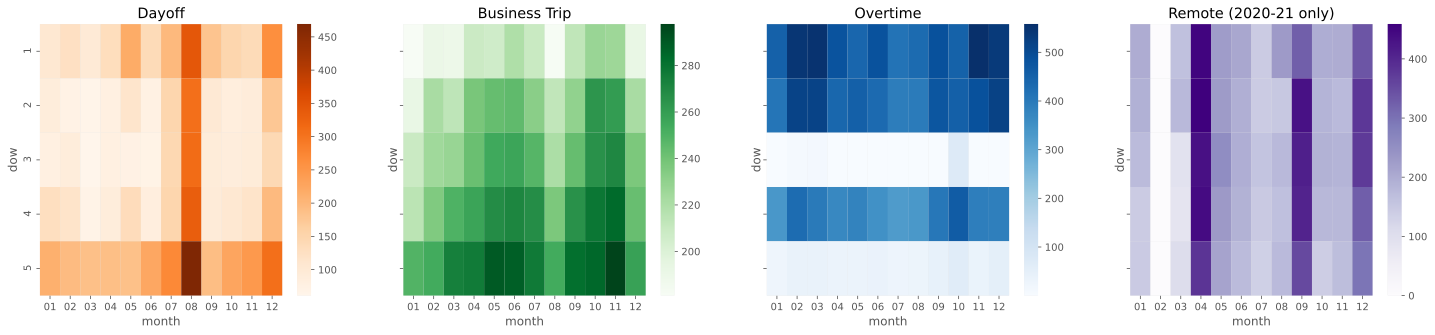

In [176]:
df = train[['date','dow','dayoff','bustrip','ovtime','remote']]
heatmap_viz(df)

휴가자수, 출장자수, 시간외 근무자수, 재택근무자수는 확연히 다른 패턴을 보입니다.
- 휴가자수(dayoff) : 월/금, 7/8/12월
- 출장자수(bustrip) : 금, 5/6/9/10/11월
  - 점심이용자수가 금요일에 매우 적었던 것을 보면, 당연한 결과입니다.
- 시간외 근무자수(overtime) : 월/화/목, 2/3월
  - 저녁 이용자수가 수, 금요일에 적은 편인 것을 보면, 자연스러운 결과입니다.
- 재택근무자수(remote) : 4/9/12월

회사 내에 있는 직원수
  - employees - (dayoff + bustrip + remote)


In [178]:
df = train[['date', "dow","employees","dayoff","bustrip","ovtime","remote","target_ln","target_dn"]]
df['in_office'] = df['employees'] - (df['dayoff'] + df['bustrip'] + df['remote'])
df['month'] = df['date'].dt.strftime("%m")
df.head(3)

,date,dow,employees,dayoff,bustrip,ovtime,remote,target_ln,target_dn,in_office,month
0,2016-02-01,1,2601,50,150,238,0.0,1039.0,331.0,2401.0,02
1,2016-02-02,2,2601,50,173,319,0.0,867.0,560.0,2378.0,02
2,2016-02-03,3,2601,56,180,111,0.0,1017.0,573.0,2365.0,02


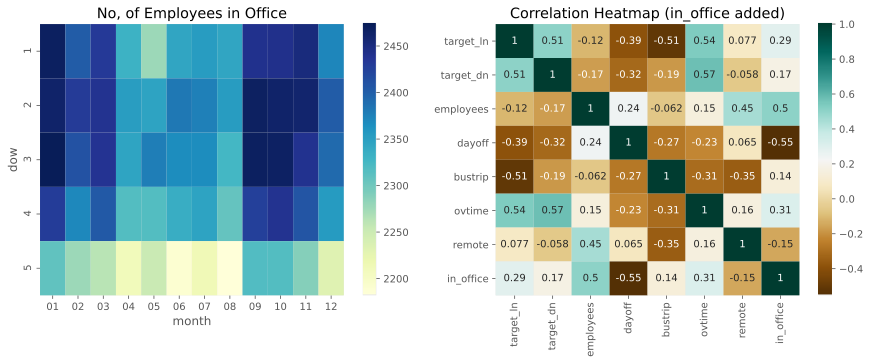

In [180]:
temp = df.groupby(['dow','month'])['in_office'].mean().reset_index().pivot(index='dow', columns='month',values='in_office')

#Heatmap
f, ax = plt.subplots(1,2, figsize=(15,5))

sns.heatmap(temp, cmap='YlGnBu', ax=ax[0])
ax[0].set_title('No, of Employees in Office')

df_corr = df[['target_ln',"target_dn","employees","dayoff","bustrip","ovtime","remote","in_office"]].corr()
sns.heatmap(df_corr, annot=True, cmap="BrBG",ax=ax[1])
ax[1].set_title("Correlation Heatmap (in_office added)")

plt.show()

회사 내 직원수(왼쪽)
- 금요일에는 상대적으로 회사 내에 있는 직원이 적음
  - 휴가자수와 출장자수가 금요일에 많았음
- 1~3월, 9~11월에 본사 내에서 일하는 직원이 많아보임

상관관계(오른쪽)
- 점심 : 0.29, 저녁 : 0.17로 그렇게 높은 상관은 아님